In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('C:/Users/A30010587/Downloads/cwp_interview/cwp_interview/'))
if module_path not in sys.path:
    sys.path.append(module_path)


import torch
import numpy as np
from typing import Optional, Dict, Any
import torch
import torch.nn as nn
from utils import TimeseriesDataset, NormalizationIdentity, NormalizationStandardization, _split_series_time_dims, _merge_series_time_dims, _easy_mlp, device
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Question2.csv", index_col=0, header=[0,1], parse_dates=True)

Data Import

In [6]:
da = data["da"]
rt = data["rt"]
X = data["X"]

# example of prices with a two day lag if you wish to use timeseries as features (ie RNN, CNN, ARIMA, etc...)
shifted_da = da.shift(freq="48H")
shifted_rt = rt.shift(freq="48H")

split = datetime(2020,8,1)

X_train = X.loc[:split]
X_validate = X.loc[split:]

da_train = da.loc[:split]
da_validate = da.loc[split:]

rt_train = rt.loc[:split]
rt_validate = rt.loc[split:]

print('\nVerify NaN values')
print('X_train',X_train.isnull().values.any())
print('Nan index in X_train',X_train.isnull().values.any(1).nonzero()[0])
X_train.fillna(X_train.median(), inplace = True)
print('X_train',X_train.isnull().values.any())
print('X_validate',X_validate.isnull().values.any())
print('da_train',da_train.isnull().values.any())
print('da_validate',da_validate.isnull().values.any())
print('rt_train',rt_train.isnull().values.any())
print('rt_validate',rt_validate.isnull().values.any())



Verify NaN values
X_train True
Nan index in X_train [10468]
X_train False
X_validate False
da_train False
da_validate False
rt_train False
rt_validate False


The higher Level of the TradingBot Model (handling everything outside the Decoder) and import the Decoder Model

Experiments

Plotting

In [9]:
from Model import TradingBot
from utils import hourly_results, worst_loss
def create_model(gamma:float, l_norm:int):
    net = TradingBot(
        num_series=100,
        input_dim = 4,
        series_embedding_dim=2,
        input_encoder_layers=3,
        gamma = gamma,
        l_norm = l_norm,
        input_encoding_normalization=True,
        data_normalization="standardization",
        loss_normalization="series",
        rnn_decoder={
            "dim_hidden_features":2,
            "num_layers":2,#32,
            "dim_output":168
        },
    )
    return net.to(device)

TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


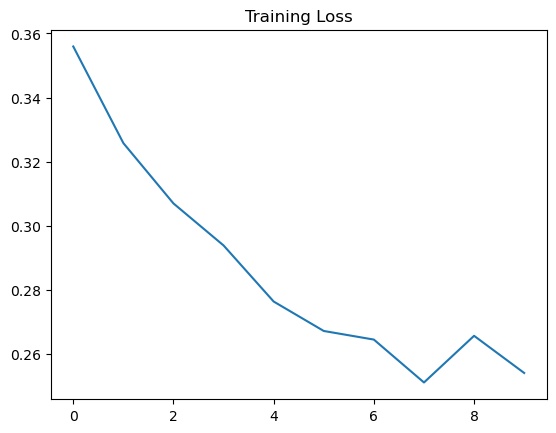

Portfolio returns 2364.888
constraint -60.414
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


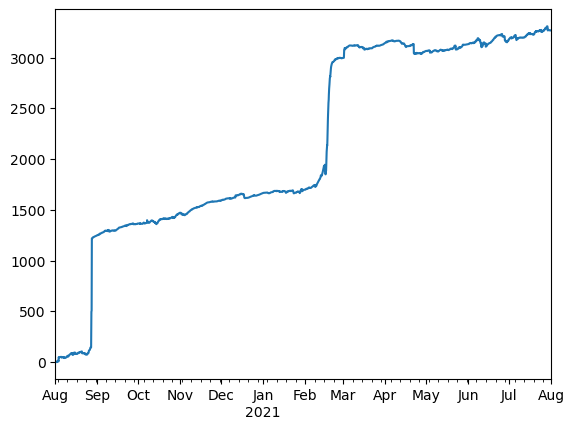

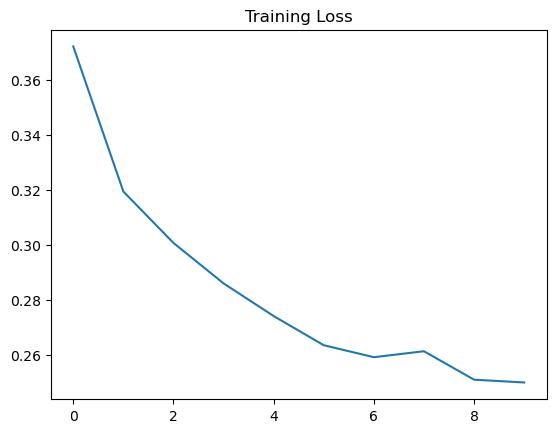

Portfolio returns 2295.3515880000004
constraint -120.68349300000001
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


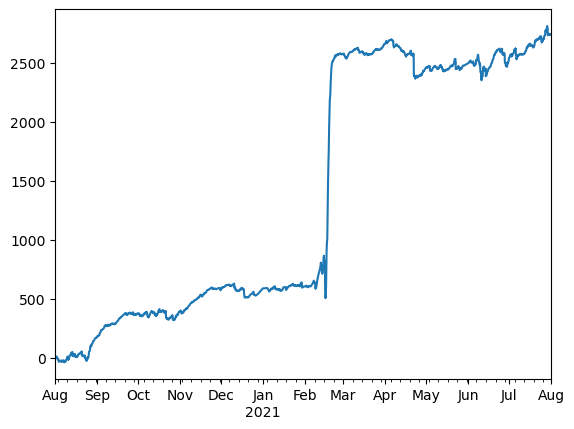

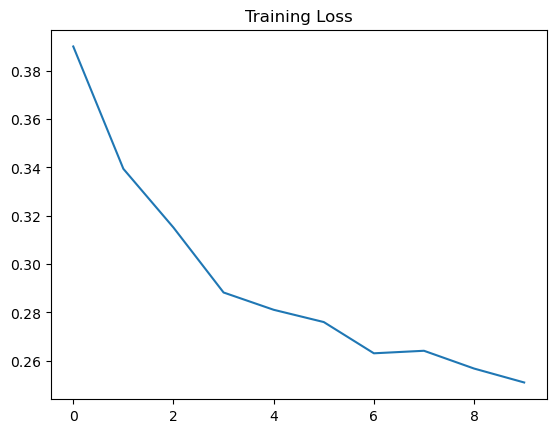

Portfolio returns 7102.14
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


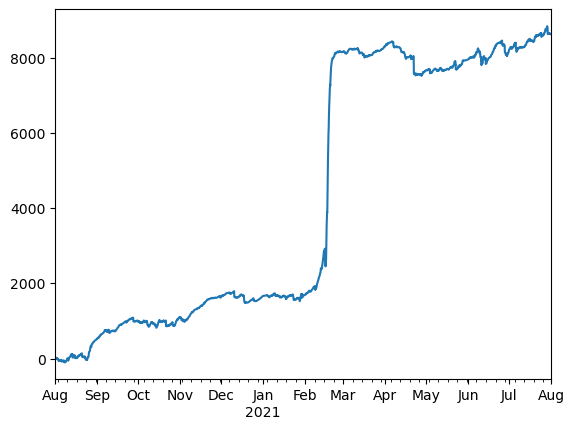

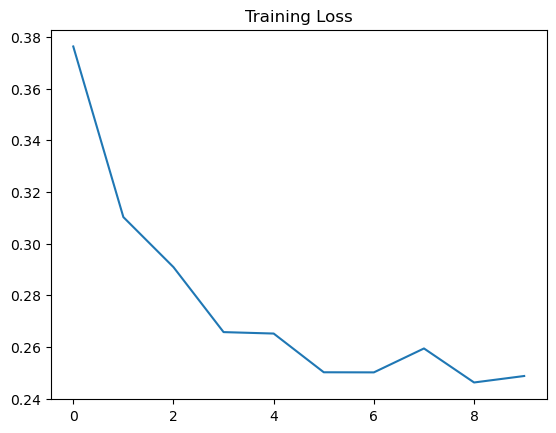

Portfolio returns 11352.363639999998
constraint -609.348445
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


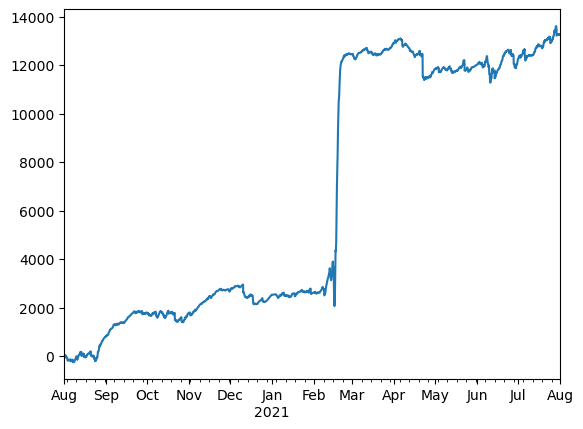

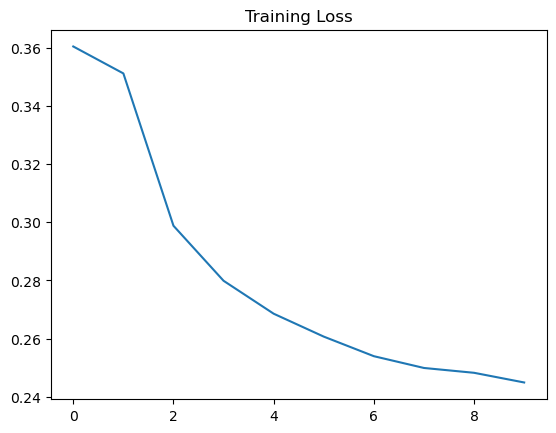

Portfolio returns 14129.748
constraint -543.726
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


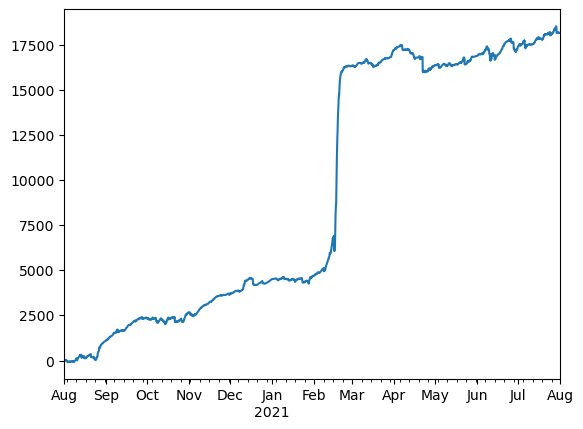

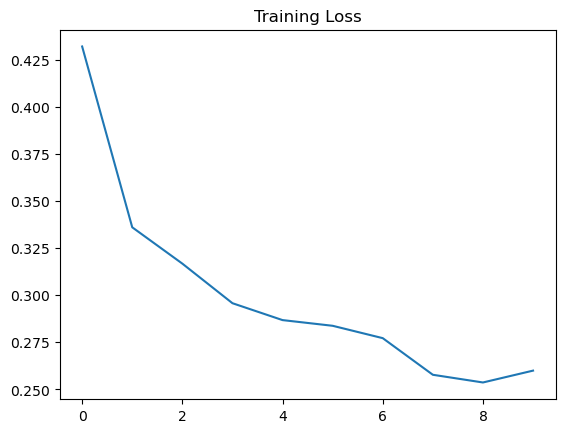

Portfolio returns 19227.608825
constraint -1081.184206


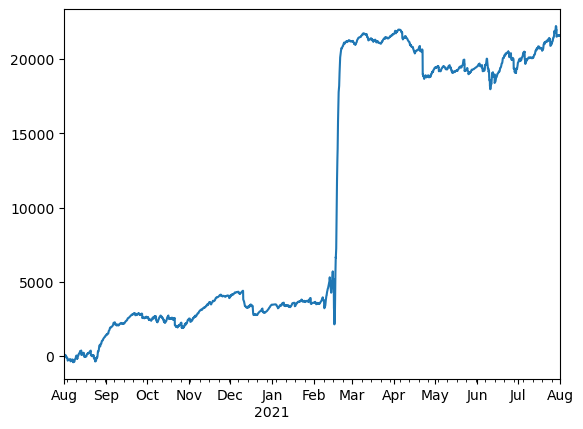

In [56]:

L_vals = [0.1, 0.5, 0.9]
L_norm = [1,2]
pd_dict={}
for k, L_val in enumerate(L_vals):
    for j in range(1,3): 
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net = create_model(gamma= L_val, l_norm=j)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 10  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('Training Loss')
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[k] = pd.DataFrame({"gamma": f"{L_vals[k]}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[k]['L_norm'] = f"L{j}"
            pd_dict[k]['PTF_Return'] = np.sum(portfolio_rets)
            pd_dict[k]['Worst_Return'] = constraint

In [57]:
pd_dict

{0:   gamma  v_shorts  v_longs L_norm   PTF_Return  Worst_Return
 0   0.1    0.0469   0.0000     L2  2295.351588   -120.683493
 1   0.1    0.0000   0.0401     L2  2295.351588   -120.683493
 2   0.1    0.0000   0.0661     L2  2295.351588   -120.683493
 3   0.1    0.0000   0.0045     L2  2295.351588   -120.683493
 4   0.1    0.0000   0.0499     L2  2295.351588   -120.683493
 5   0.1    0.0883   0.0390     L2  2295.351588   -120.683493
 6   0.1    0.0000   0.0000     L2  2295.351588   -120.683493,
 1:   gamma  v_shorts  v_longs L_norm   PTF_Return  Worst_Return
 0   0.5    0.0797   0.0000     L2  11352.36364   -609.348445
 1   0.5    0.0000   0.2052     L2  11352.36364   -609.348445
 2   0.5    0.0000   0.3248     L2  11352.36364   -609.348445
 3   0.5    0.0000   0.0290     L2  11352.36364   -609.348445
 4   0.5    0.0000   0.2460     L2  11352.36364   -609.348445
 5   0.5    0.4936   0.2027     L2  11352.36364   -609.348445
 6   0.5    0.0000   0.0000     L2  11352.36364   -609.348445,


In [46]:
pd_dict[0]['Worst_Return'][0]

-119.61753300000001

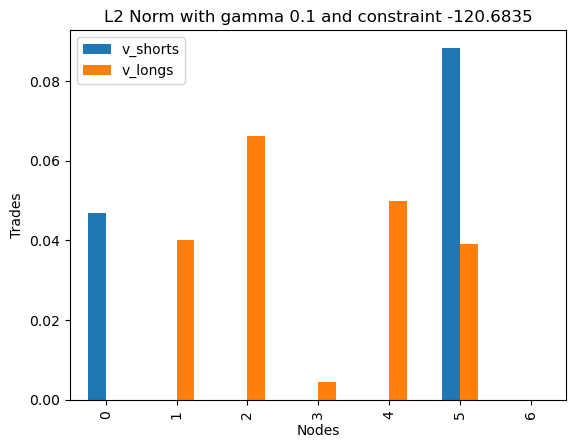

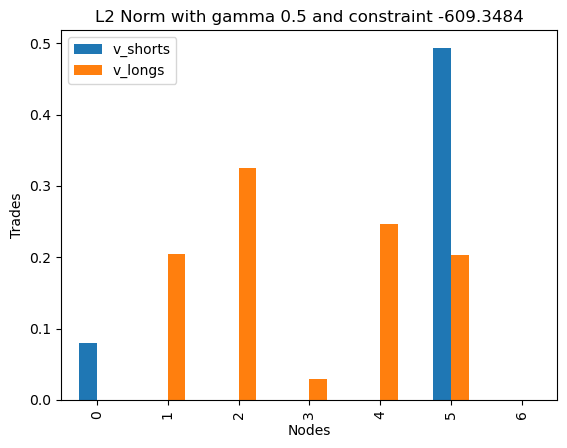

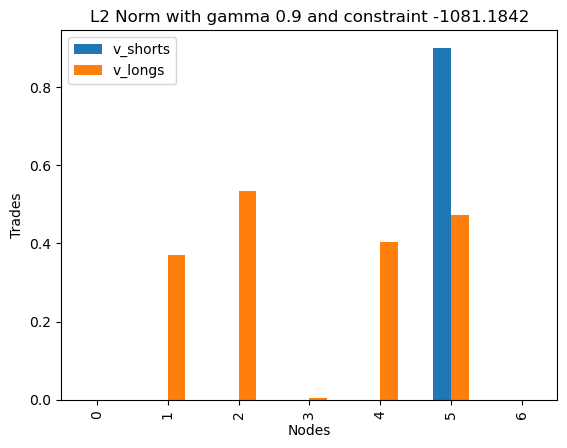

In [60]:

for i in range (0,3):
    pd_dict[i].loc[:, :'L_norm'].plot(kind="bar")
    plt.title("L{} Norm with gamma {} and constraint {}".format(j,pd_dict[i]['gamma'][0], round(pd_dict[i]['Worst_Return'][0],4)) )
    plt.xlabel("Nodes")
    plt.ylabel("Trades")

In [ ]:
pd_dict

{0:   gamma  v_shorts   v_longs
 0   0.1 -0.773887 -0.212438
 1   0.1 -0.222644 -1.105901
 2   0.1 -2.118918 -0.385886
 3   0.1  0.040965 -0.257812
 4   0.1 -0.344030  0.465194
 5   0.1 -0.807504 -1.015777
 6   0.1 -0.185350  0.694668,
 1:   gamma  v_shorts   v_longs
 0   0.5 -0.316438 -1.218520
 1   0.5  0.401123  1.617973
 2   0.5  1.350715 -0.360052
 3   0.5 -0.643073 -0.080667
 4   0.5 -1.552110 -1.433700
 5   0.5 -0.134477 -0.047725
 6   0.5 -0.015115 -0.096208,
 2:   gamma  v_shorts   v_longs
 0   0.9 -1.181281  0.231181
 1   0.9 -1.052374 -0.054647
 2   0.9 -1.037603  0.696066
 3   0.9 -1.916607 -0.539277
 4   0.9  0.735587 -0.780277
 5   0.9  1.600556  0.167196
 6   0.9 -0.712550 -0.606753}

In [ ]:
# L_vals = [0.1, 0.5, 0.9]
# pd_dict={}
# for k, L_val in enumerate(L_vals):
#     nodes = 7
#     volume_short = np.zeros((len(L_vals), nodes))
#     volume_long = np.zeros((len(L_vals), nodes))
#     vv = np.random.normal(0,1,7)
#     ss = np.random.normal(0,1,7)
#     for i in range(nodes):
#         volume_long[k, :] = vv
#         volume_short[k, :] = ss
#         pd_dict[k] = pd.DataFrame({"gamma": f"{L_vals[k]}",
#                            "v_shorts":vv,
#                            "v_longs":ss})

In [ ]:
pd_dict

{0:   gamma  v_shorts   v_longs
 0   0.1 -0.175450  1.751717
 1   0.1  1.226956 -0.158316
 2   0.1 -0.013138  0.824461
 3   0.1 -0.397796  0.271670
 4   0.1  1.366455 -0.463675
 5   0.1 -2.286451 -0.838672
 6   0.1 -0.367480 -0.931422,
 1:   gamma  v_shorts   v_longs
 0   0.5  1.284702 -0.276505
 1   0.5 -1.518090 -1.647822
 2   0.5 -0.727429  0.781885
 3   0.5 -0.283952 -0.808581
 4   0.5  0.574353  0.861544
 5   0.5 -0.538929  0.197420
 6   0.5  1.436544 -0.698214,
 2:   gamma  v_shorts   v_longs
 0   0.9  0.347407 -2.809001
 1   0.9  0.477282  1.540749
 2   0.9  0.463770 -0.058382
 3   0.9  0.409770 -0.665615
 4   0.9  0.290665 -0.055820
 5   0.9 -0.700328  0.262122
 6   0.9  0.861511 -0.262594}